In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import pickle

In [3]:
with open('data_for_5/houses_prepared_encoded.pkl', 'rb') as f:
    houses_train_encoded = pickle.load(f)
    houses_test_encoded = pickle.load(f)

houses_test_encoded.head() 

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,0.0,4.0,5.0,1960,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,0.0,5.0,4.0,1961,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,0.0,4.0,4.0,1958,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,0.0,3.0,5.0,1968,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,0.0,5.0,5.0,1997,1998,...,0,0,1,0,1,0,0,0,0,1


In [11]:
# lets estimate a linear regression model to predict the price of the houses
# using all the features in the dataset and the common approach applied in sci-kit learn

# lets start by defining the features and the target variable

X = houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'], axis = 1)
y = houses_train_encoded['Sale_Price']

# lets define the model
houses_model1 = LinearRegression()

# lets fit the model
houses_model1.fit(X, y)

LinearRegression()

In [19]:
# lets use the model to predict the price of the houses in the same dataset

y_pred = houses_model1.predict(houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'],
                                                          axis = 1))

rmse = np.sqrt(mean_squared_error(houses_train_encoded['Sale_Price'], y_pred))

mae = mean_absolute_error(houses_train_encoded['Sale_Price'], y_pred)

medae = median_absolute_error(houses_train_encoded['Sale_Price'], y_pred)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 17112.735024371534
Root Mean Squared Error: 27548.01669321027
Median Absolute Error: 11949.157615486998


In [23]:
# But we wish to have more metrics to evaluate the model
# and a single function that returns them all as a dictionary

def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {'RMSE': rmse, 'MAE': mae, 'MedAE': medae, 'MAPE': mape, 'R2': r2}

In [25]:
# X = houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'], axis = 1)
# y = houses_train_encoded['Sale_Price']
# houses_model1 = LinearRegression()
# houses_model1.fit(X, y)

regression_metrics(y, houses_model1.predict(X))

{'RMSE': 27548.01669321027,
 'MAE': 17112.735024371534,
 'MedAE': 11949.157615486998,
 'MAPE': 9.932225949902959,
 'R2': 0.8825600985077463}

# Assessment of the binary classification

In [31]:
churn_train_encoded = pd.read_pickle('data_for_5/churn_train_encoded.pkl')
churn_test_encoded = pd.read_pickle('data_for_5/churn_test_encoded.pkl')

churn_train_encoded.head()

,customer_id,customer_age,customer_number_of_dependents,customer_education,customer_salary_range,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,...,average_utilization,customer_gender_M,customer_gender_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver,account_status_1
4694,799562,50.0,2.0,2.0,1.0,37.0,13384.0,1.0,3.0,2.0,...,0.000,0,0,1,0,0,0,0,1,0
1263,282706,52.0,1.0,2.0,5.0,36.0,31945.0,4.0,3.0,5.0,...,0.050,1,0,0,0,0,0,0,0,0
4427,837683,46.0,3.0,1.0,3.0,36.0,5489.0,5.0,1.0,2.0,...,0.217,1,0,0,1,0,0,0,0,0
8746,384742,53.0,5.0,0.0,4.0,48.0,9517.0,6.0,1.0,0.0,...,0.196,1,0,1,0,0,0,0,0,0
4386,618362,59.0,0.0,4.0,2.0,53.0,4241.0,3.0,2.0,3.0,...,0.000,1,0,1,0,0,0,0,0,0


In [33]:
# lets estimate a logistic regression model to predict the churn of the customers
# using all the features in the dataset and the common approach applied in sci-kit learn

# omit also CUSTOMER ID !!!!!
X = churn_train_encoded.drop(['account_status_1', 'customer_id'], axis=1) 

y = churn_train_encoded['account_status_1']

# lets define the model
churn_model1 = LogisticRegression(penalty = None, # No regularization
                             max_iter = 5000, # number of iterations, default = 100
                             tol = 1e-2) # Tolerance for stopping criteria, default=1e-4


churn_model1.fit(X, y)

LogisticRegression(max_iter=5000, penalty=None, tol=0.01)

In [35]:
# lets see how to predict probabilities of account_status=closed (1) for the train dataset
# the method .predict_proba() returns the probabilities for each class

churn_model1.predict_proba(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis=1
))

# the first column includes predictions for level 0 and the second column for level 1

array([[0.83412663, 0.16587337],
       [0.80516067, 0.19483933],
       [0.95698578, 0.04301422],
       ...,
       [0.24841416, 0.75158584],
       [0.71073281, 0.28926719],
       [0.98567436, 0.01432564]])

In [45]:
# how to extract predicted probabilities of account_status = closed (1)?
y_pred_probs = churn_model1.predict_proba(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis = 1
))[:, 1]  # to extract column 1 which is level 1 from predictions


# if one just wants to predict the class (for default cutoff = 0.5), 
# one can use the method .predict()
y_pred = churn_model1.predict(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis = 1
))


# calculate the confussion matrix
cm = confusion_matrix(churn_train_encoded['account_status_1'], y_pred)


# calculate the false positive rate and the true positive rate
fpr, tpr, _ = roc_curve(churn_train_encoded['account_status_1'], y_pred_probs)
# y_true: True binary labels
# y_score: Target scores - probability estimates of the positive class


# calculate the area under the curve
roc_auc = auc(fpr, tpr)

print('Confusion Matrix:')
print(cm)

print('Area Under the Curve:', roc_auc)

Confusion Matrix:
[[5774  175]
 [ 603  536]]
Area Under the Curve: 0.883513227963


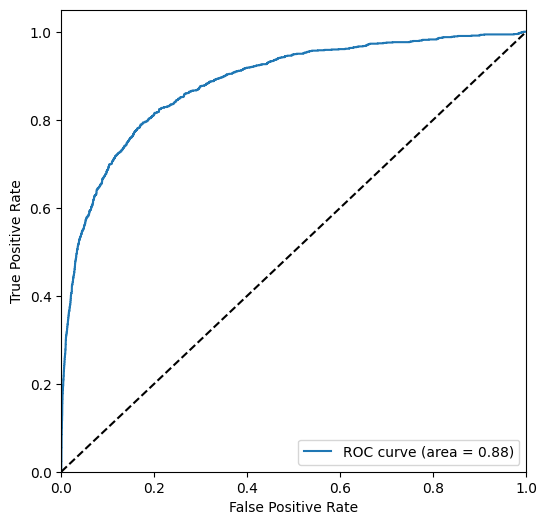

In [48]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [50]:
print(classification_report(churn_train_encoded['account_status_1'], y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5949
           1       0.75      0.47      0.58      1139

    accuracy                           0.89      7088
   macro avg       0.83      0.72      0.76      7088
weighted avg       0.88      0.89      0.88      7088



In [52]:
# we will write a function that calculates various metrics for the classification model,
# allows to define a custom threshold for the predicted probabilities
# and stores the results in a dictionary

def classification_metrics(y_true, y_pred_prob, cutoff = 0.5):
    y_pred = (y_pred_prob > cutoff).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
    precision_1 = cm[1,1] / (cm[1,1] + cm[0,1])
    precision_0 = cm[0,0] / (cm[0,0] + cm[1,0])
    recall_1 = cm[1,1] / (cm[1,1] + cm[1,0])
    recall_0 = cm[0,0] / (cm[0,0] + cm[0,1])
    f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
    f1_score_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0)
    # averages of the metrics for both classes
    balanced_accuracy = (recall_0 + recall_1) / 2
    balanced_precision = (precision_0 + precision_1)/2
    balanced_f1 = (f1_score_0 + f1_score_1) / 2

    return {'AUROC': roc_auc, 'Accuracy': accuracy, 'Precision 1': precision_1,
            'Precision 0': precision_0, 'Recall 1': recall_1, 'Recall 0': recall_0,
            'F1 Score 1': f1_score_1, 'F1 Score 0': f1_score_0, 'Balanced Accuracy': balanced_accuracy,
            'Balanced precision': balanced_precision, 'Balanced F1': balanced_f1}

In [54]:
classification_metrics(y, churn_model1.predict_proba(X)[:, 1])

# recall for 1 is just 0.47
# lets try to change the threshold for the predicted probabilities

{'AUROC': 0.883513227963,
 'Accuracy': 0.8902370203160271,
 'Precision 1': 0.7538677918424754,
 'Precision 0': 0.905441430139564,
 'Recall 1': 0.47058823529411764,
 'Recall 0': 0.9705832913094637,
 'F1 Score 1': 0.5794594594594595,
 'F1 Score 0': 0.9368813889339607,
 'Balanced Accuracy': 0.7205857633017907,
 'Balanced precision': 0.8296546109910197,
 'Balanced F1': 0.7581704241967101}

In [56]:
# try the threshold 0.16
classification_metrics(y, churn_model1.predict_proba(X)[:, 1], 0.16)

{'AUROC': 0.883513227963,
 'Accuracy': 0.8020598194130926,
 'Precision 1': 0.4375,
 'Precision 0': 0.9567926045016077,
 'Recall 1': 0.8112379280070237,
 'Recall 0': 0.800302571860817,
 'F1 Score 1': 0.5684404798523531,
 'F1 Score 0': 0.8715789473684211,
 'Balanced Accuracy': 0.8057702499339203,
 'Balanced precision': 0.6971463022508039,
 'Balanced F1': 0.7200097136103871}

In [58]:
# lets check how all these metrics change with the theshold
# and combine them into a dataframe
thresholds = np.arange(0, 1, 0.05)

# now we will calculate the metrics for each threshold
for t in thresholds:
    metrics = classification_metrics(y, churn_model1.predict_proba(X)[:,1], t)

    # Lets add the current result to the results dataframe
    # adding t as the first column
    if t == 0:
        results = pd.DataFrame(metrics, index=[t])
    else:
        results.loc[t] = metrics

C:\Users\khali\AppData\Local\Temp\ipykernel_14644\3697927685.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision_0 = cm[0,0] / (cm[0,0] + cm[1,0])


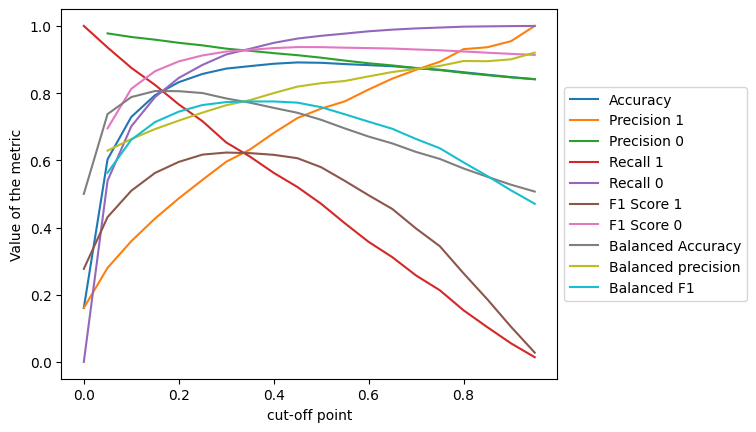

In [62]:
# plot the results showing how the metrics change with the threshold
# skip AUC as it is not affected by the threshold
results.drop('AUROC', axis=1).plot()
# put the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('cut-off point')
plt.ylabel('Value of the metric')
plt.show()

# Assessment of multilevel classification

In [69]:
cards_train = pd.read_pickle('data_for_5/cards_train.pkl')
cards_test = pd.read_pickle('data_for_5/cards_test.pkl')

cards_test.head()

,credit_limit,n_contracts,utilization,status,gender
5484,24840,53,91.2,1,K
2126,1605,8,100.0,2,K
4683,26420,50,62.3,1,K
4065,6530,24,26.1,0,K
64,5070,16,39.4,0,K


In [71]:
# we need to encode the categorical variable: gender into dummy variables

cards_train_encoded = pd.get_dummies(cards_train, 
                                     columns = ['gender'],
                                     drop_first = True,
                                     dtype = int
                                    )

cards_test_encoded = pd.get_dummies(cards_test,
                                    columns = ['gender'],
                                    drop_first = True,
                                    dtype = int
                                   )

In [73]:
# estimate a logistic regression model to predict the status of the cards
# using all the features in the dataset and the common approach applied in sci-kit learn

cards_train_X = cards_train_encoded.drop('status', axis=1)
cards_train_y = cards_train_encoded['status']

cards_model1 = LogisticRegression(multi_class = 'multinomial', # multi-class classification
                                  penalty = None,  # No regularization
                                  max_iter = 5000,
                                  tol = 0.01
                                 )

cards_model1.fit(cards_train_X, cards_train_y)

C:\Users\khali\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial', penalty=None,
                   tol=0.01)

In [77]:
# predict the status of the cards in the train dataset

cards_fitted = cards_model1.predict(cards_train_encoded.drop('status', axis=1))

# check the frequency of the predicted values
cards_fitted_series = pd.Series(cards_fitted)
print(cards_fitted_series.value_counts())

# the most commonly predicted value is 0 (status = Open)

0    3205
1     903
2     862
Name: count, dtype: int64


In [81]:
# let's see the comparison of actual and fitted values
# (equivalent to classification table)

conf_matrix = confusion_matrix(cards_train['status'], cards_fitted)

# convert to DataFrame for readability
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index = [f'Actual {i}' for i in cards_train['status'].unique()],
    columns = [f'Predicted {i}' for i in cards_train['status'].unique()]
)

print(conf_matrix_df)

          Predicted 0  Predicted 1  Predicted 2
Actual 0         2667          101           54
Actual 1          291          774           25
Actual 2          247           28          783


In [83]:
# we can also see a detailed classification report
# similarly to binary classification, but for each class separately

cards_train_report = classification_report(cards_train['status'], cards_fitted)

print(cards_train_report)

# status 0 predicted correctly in 95% of cases - the remaining slightly worse (recall)
# precision highest for level 2 (C) - most observations predicted as
# this level actually have problems with paying off credit card debts

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2822
           1       0.86      0.71      0.78      1090
           2       0.91      0.74      0.82      1058

    accuracy                           0.85      4970
   macro avg       0.87      0.80      0.83      4970
weighted avg       0.85      0.85      0.85      4970



In [85]:
# how to calculate the predicted probabilities of individual levels?
# just use the .predict_proba() method

# let's show an example on a training sample

cards_fitted_probs = cards_model1.predict_proba(
    cards_train_encoded.drop('status', axis=1)
)

# convert the resulting numpy array to a DataFrame for readability
cards_fitted_probs_df = pd.DataFrame(cards_fitted_probs)

cards_fitted_probs_df.head()

# generally the final predicted value is the one with the highest individual probability
# but this will not always be easy and conclusive

,0,1,2
0,0.810114,0.081982,0.107903
1,0.841937,0.125063,0.033000
2,0.800642,0.146920,0.052438
3,0.829742,0.156939,0.013318
4,0.798102,0.092441,0.109457
